In [1]:
import numpy as np
import math
import random
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

در این تابع ابتدا داده را ورودی میگیریم

In [2]:
beta=100
mean =list(pd.read_csv("expected_return.csv").values)
cov = list(pd.read_csv("covariance_matrix.csv").values)

این تابع محاسبه هزینه است کند که باید آن را مینیمم کنیم.

In [3]:
def calculate_cost(x,cov,mean):
    mean=[mean]
    mean=np.array(mean)
    x_t=[x]
    c_t=np.array(x_t)
    c=c_t.transpose()
    port_mean=np.matmul(mean,c)
    initial_investment=1
    tmp=np.matmul(cov,c)
    port_stdev=np.matmul(c_t,tmp)   
    stdev_investment = initial_investment * port_stdev
    mean_investment = (1+port_mean) * initial_investment
    conf_level1 = 0.05
    cutoff = norm.ppf(conf_level1, mean_investment, stdev_investment)
    Var=initial_investment-cutoff
    return float(Var)

این تابع محاسبه همسایگی است. به این صورت عمل می‌کند که با درصدی که مشخص کردیم توسط یکی از دو روش نقطه جدیدی تولید میکند، اگر هزینه کم‌تر شد، آن را جابه‌جا می‌کند. اگر هم بهتر نبود، با یک شانس که بسته به دما و اختلاف هزینه‌ها است، تعویض می کند.

In [4]:
def neighbor(orders, temperature, cov,choose_per,mean):
    chance=random.randint(0,100)
    if(chance<choose_per):
        new_orders = orders.copy()
        i=random.randint(0, len(orders) - 1)
        j=random.randint(0, len(orders) - 1)
        while(i==j):
            i = random.randint(0, len(orders) - 1)
            j = random.randint(0, len(orders) - 1)

        temp = new_orders[i]
        new_orders[i] = new_orders[j]
        new_orders[j] = temp
    else:
        new_orders = orders.copy()
        count=random.choices([1,2,3,4,5,6,7,8],weights=[15,40,50,50,30,15,10,5],k=1)
        for i in range(count[0]):
            j=random.randint(0, len(orders) - 1)
            new_orders[j]=random.uniform(0.0,1.0)
        tmpsum=sum(new_orders)
        if(tmpsum!=1):
            new_orders=new_orders/tmpsum
        
    
    cost = calculate_cost(orders,cov,mean)
    new_cost = calculate_cost(new_orders, cov,mean)
    
    if (new_cost < cost):
        orders = new_orders.copy()
        return orders
        
    rand = random.random()
    if (rand < math.exp((cost - new_cost)/temperature)):
        orders = new_orders.copy()
    
    return orders

In [5]:
def generate_first_permutaion(n):
    permutation=np.random.randint(100,size=n)
    permutation=permutation/ sum(permutation)
    return permutation

این تابع اصلی است. به این صورت عمل کرده که ابتدا یک جایگشت می‌سازیم. سپس همسایه را محاسبه می‌کنیم و سپس بهترین را به‌روز می‌کنیم و بعد دما را کم می‌کنیم.

In [6]:
def simulated_annealing(temperature, alpha, TL, i,n,cov,choose_per,mean):
    all_of_results=[]
    requests =generate_first_permutaion(n)

    best_order = []
    least_cost = np.Inf
    costs = []
    best_costs = []
    while(temperature > 0.1):
        for i in range(TL):
            requests = neighbor(requests, temperature, cov , choose_per,mean)
            
            if (calculate_cost(requests, cov,mean) < least_cost):
                best_order = requests
                least_cost = calculate_cost(requests, cov,mean)
            print(least_cost,end='\r')
            all_of_results.append(least_cost)
                
            costs.append(calculate_cost(requests, cov,mean))
            best_costs.append(least_cost)
        temperature *= alpha
        
    return best_order, least_cost, costs, best_costs,all_of_results

In [7]:
random.seed(100)
order, least, costs, best_costs,all_of_resaults = simulated_annealing(1, 0.99, 1000, 1,10,cov,10,mean) #input = input1.stock
print(order)
print(least)

[3.08510665e-01 1.62970552e-02 2.09522160e-04 1.51919237e-02
 4.60443428e-03 9.77223656e-03 1.03625578e-02 2.85387471e-01
 3.48408785e-01 1.25534854e-03]
-0.006238190696826296


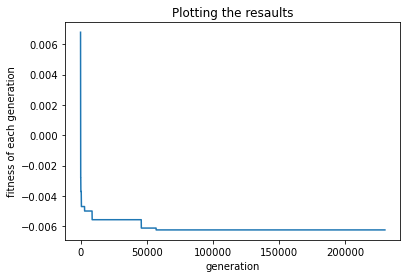

In [10]:
arr=all_of_resaults
ite = [i+1 for i in range(len(arr))]
plt.plot(ite, arr)
plt.ylabel('fitness of each generation') #set the label for y axis
plt.xlabel('generation') #set the label for x-axis
plt.title("Plotting the resaults") #set the title of the graph
plt.show() #display the graph